In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state = 23)

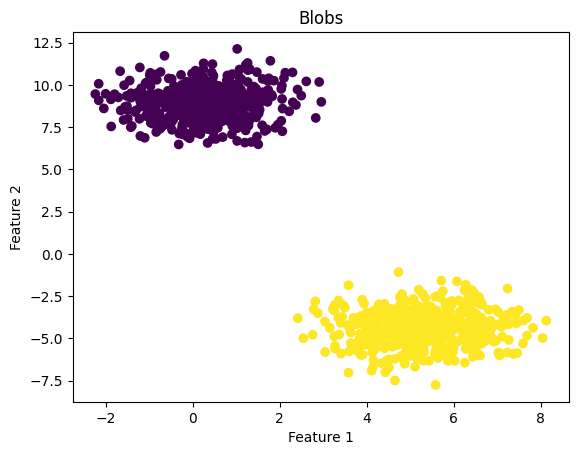

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Blobs')
plt.show()

In [6]:
# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

# Fit K-means for different values of k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)

    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)

    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]


Distortion values:
1 : 52.20380998393333
2 : 1.9824960817059742
3 : 1.6560750762546457
4 : 1.3044487248768477
5 : 1.0868047371611587
6 : 0.9217327808831817
7 : 0.8090527717124197
8 : 0.6985328816296879
9 : 0.6401572079579682


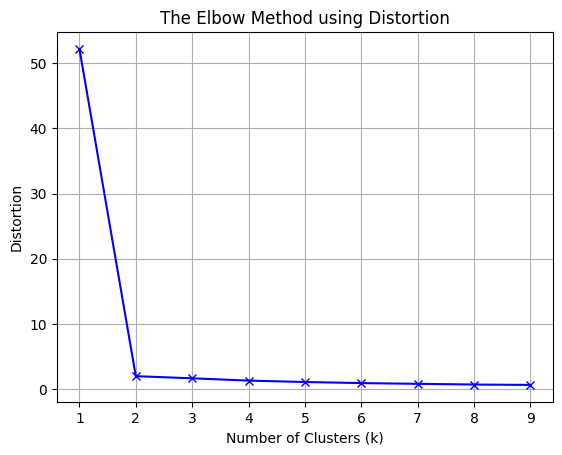

In [7]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()


Inertia values:
1 : 52203.80998393337
2 : 1982.4960817059755
3 : 1656.075076254646
4 : 1304.4487248768464
5 : 1086.8047371611574
6 : 921.7327808831812
7 : 809.0527717124187
8 : 698.5328816296868
9 : 640.157207957968


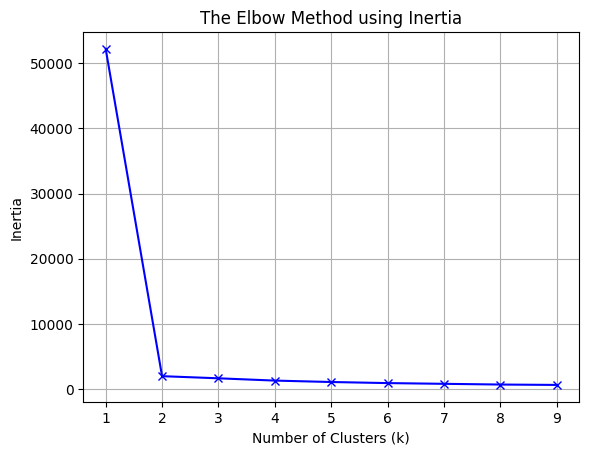

In [8]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()


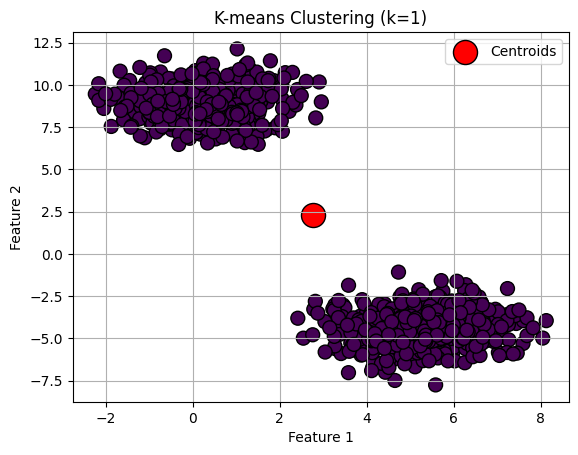

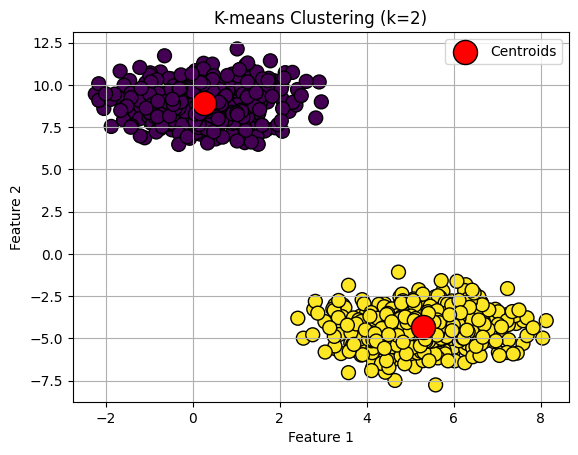

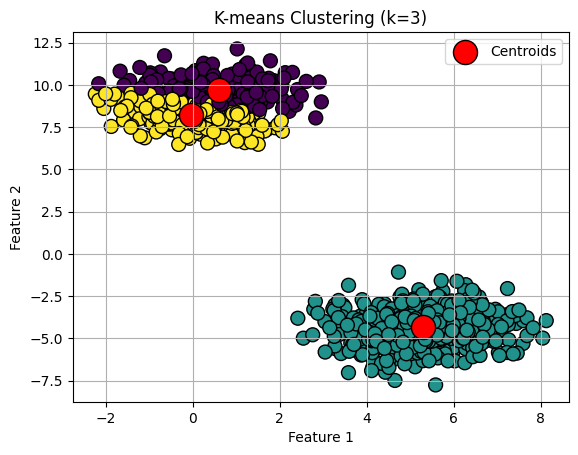

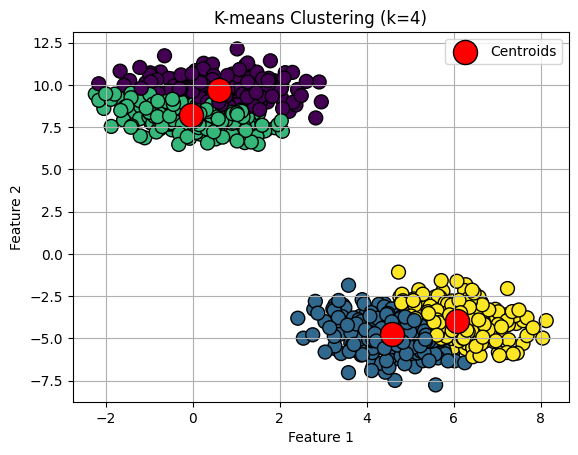

In [9]:
# Initialize a range of k values
k_range = range(1, 5)

# Fit and plot data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Plot the clustered data points
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()